# EXAMPLE APP

Example of usage FastApi together with SQLite

- Imports: Import FastAPI, sqlite3 for database handling, and Pydantic's BaseModel for data validation.
- SQLite Initialization: Connect to 'users.db', create 'users' table if it doesn't exist, and close the connection.
- FastAPI App: Initialize a FastAPI application.
- GET /users Endpoint: Define an asynchronous route to fetch all users from the 'users' table.
- User Model: Define a Pydantic model User with name (str) and age (int) fields.
- POST /users Endpoint: Define an asynchronous route to add a new user to the 'users' table.

In [1]:
import sqlite3

from fastapi import FastAPI
from pydantic import BaseModel


conn = sqlite3.connect('users.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS users (id INTEGER PRIMARY KEY, name TEXT, age INTEGER)''')
conn.commit()
conn.close()

app = FastAPI()


@app.get("/users")
async def get_users():
    conn = sqlite3.connect('users.db')
    c = conn.cursor()

    c.execute('SELECT * FROM users')
    users_list = c.fetchall()

    return users_list


class User(BaseModel):
    name: str
    age: int


@app.post("/users")
async def create_user(user: User):
    conn = sqlite3.connect('users.db')
    c = conn.cursor()

    c.execute('''INSERT INTO users (name, age) VALUES (?, ?)''', (user.name, user.age))

    conn.commit()
    conn.close()

    return f"Created new user: {user}"

### Using app - Creating users

We will use POST method on http://127.0.0.1:8000/users accompanied by payload in json form.

In [2]:
import json

import requests


user = {
    "name": "Alice",
    "age": 20,
}

response = requests.post('http://127.0.0.1:8000/users', data=json.dumps(user))
print(response.status_code)
print(response.text)
print(type(response.text))

200
"Created new user: name='Alice' age=20"
<class 'str'>


In [3]:
import json

import requests


users = [
    {
        "name": "Bob",
        "age": 25,
    },
    {
        "name": "Charlie",
        "age": 30,
    },
    {
        "name": "Diana",
        "age": 50,
    },
]

for user in users:
    response = requests.post('http://127.0.0.1:8000/users', data=json.dumps(user))
    print(response.status_code, response.text)

200 "Created new user: name='Bob' age=25"
200 "Created new user: name='Charlie' age=30"
200 "Created new user: name='Diana' age=50"


### Using app - Listing users

Use GET method to obtain users from the app.

In [4]:
import json
import requests

response = requests.get('http://127.0.0.1:8000/users')
print(response.status_code)
print(response.text)
print(type(response.text))

200
[[1,"Alice",20],[2,"Bob",25],[3,"Charlie",30],[4,"Diana",50],[5,"Alice",20],[6,"Bob",25],[7,"Charlie",30],[8,"Diana",50],[9,"Alice",20],[10,"Bob",25],[11,"Charlie",30],[12,"Diana",50]]
<class 'str'>


Or we can achive the same with GUI

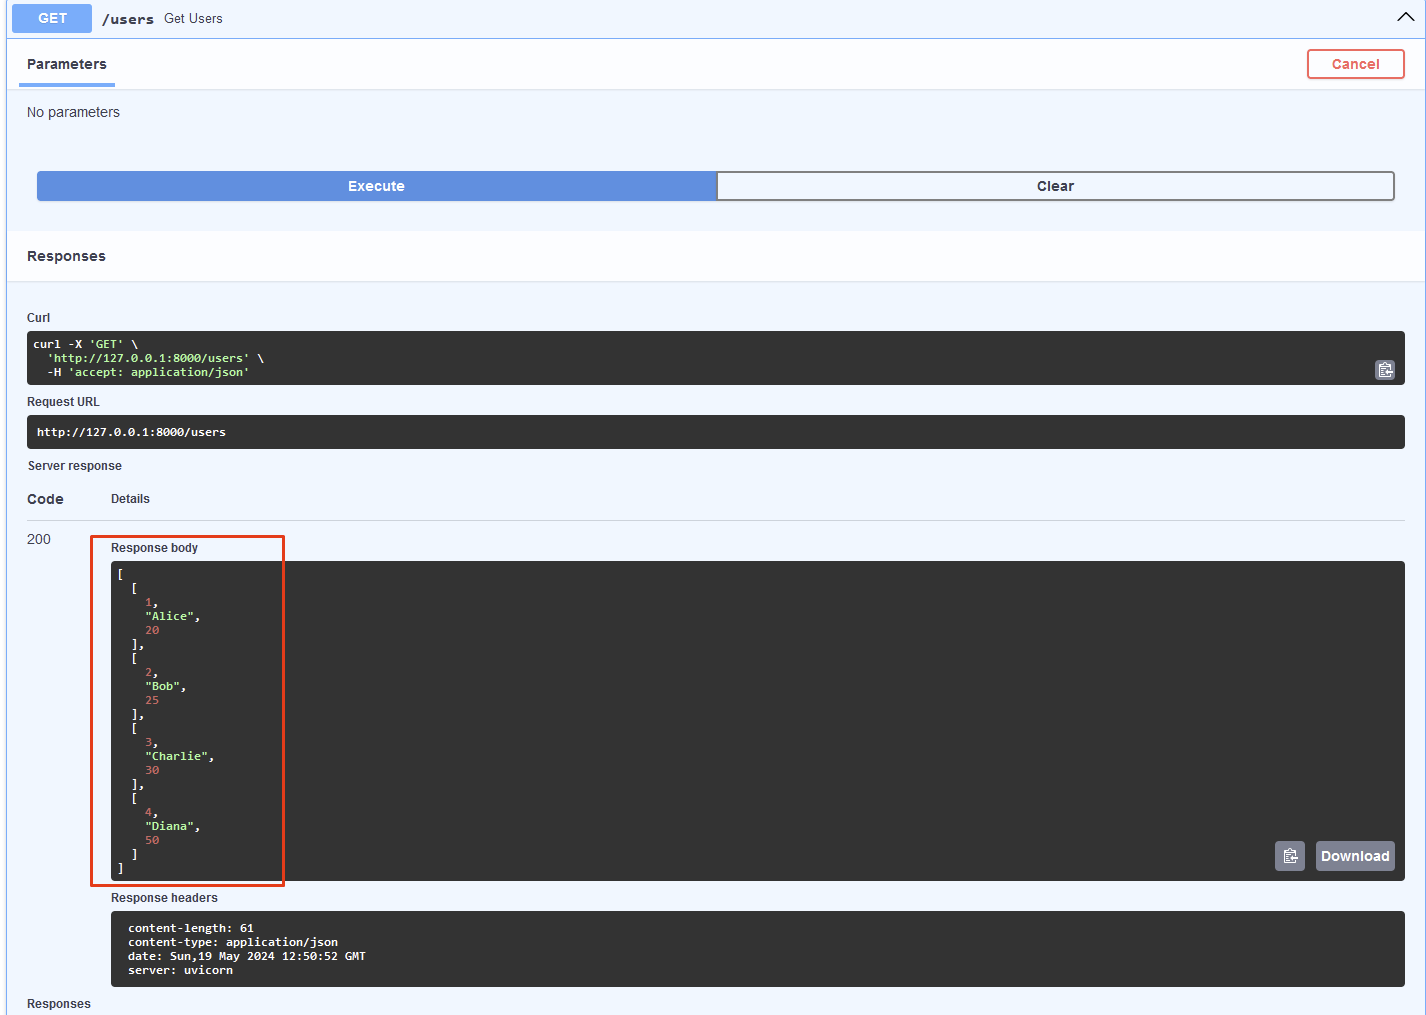